In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### READ THE DATA 

In [2]:
df = pd.read_csv('Job_Placement_Data.csv')
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [3]:
df.shape
# rows=215, cols=13

(215, 13)

#### HANDLING THE NULL VALUES 

In [4]:
df.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

#### HANDLING THE DUPLICATES 

In [5]:
df.duplicated().sum()

0

In [11]:
#### Preprocessing Steps
# 1) Missing Value Imputation
# 2) Encoding Categorical Columns
# 3) Scaling/Standardization
# 4) Outlier Treatment
# 5) Handling data Imbalance

#### CHECK THE DATA TYPES 

In [6]:
df.dtypes

gender                  object
ssc_percentage         float64
ssc_board               object
hsc_percentage         float64
hsc_board               object
hsc_subject             object
degree_percentage      float64
undergrad_degree        object
work_experience         object
emp_test_percentage    float64
specialisation          object
mba_percent            float64
status                  object
dtype: object

#### EXTRACTING THE NUMERICAL AND CATEGORICAL COLUMNS

In [7]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree',
       'work_experience', 'specialisation', 'status'],
      dtype='object')
Index(['ssc_percentage', 'hsc_percentage', 'degree_percentage',
       'emp_test_percentage', 'mba_percent'],
      dtype='object')


#### CHECKING THE UNIQUE VALUES IF PRESENT IN NUMERICAL COLUMNS 

In [8]:
for i in num_cols:
    print(f'Features {i}')
    print(df[i].nunique())
    print('*'*40)

Features ssc_percentage
103
****************************************
Features hsc_percentage
97
****************************************
Features degree_percentage
89
****************************************
Features emp_test_percentage
100
****************************************
Features mba_percent
205
****************************************


### EDA

In [9]:
df.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

#### INFERENCE : 
TARGET VARIABLLE IS STATUS 

#### GENERATING COUNTPLOT FOR CATEGORICAL COLUMNS 

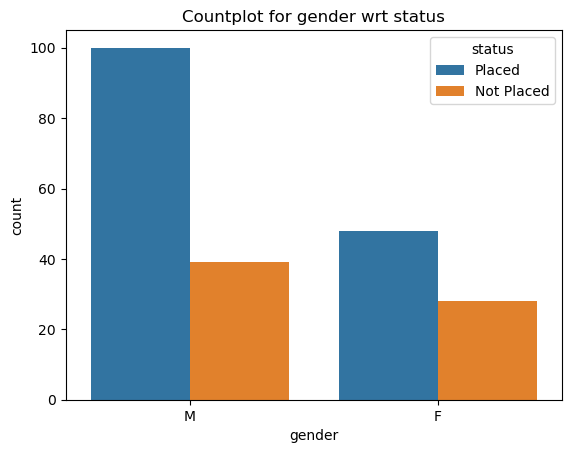

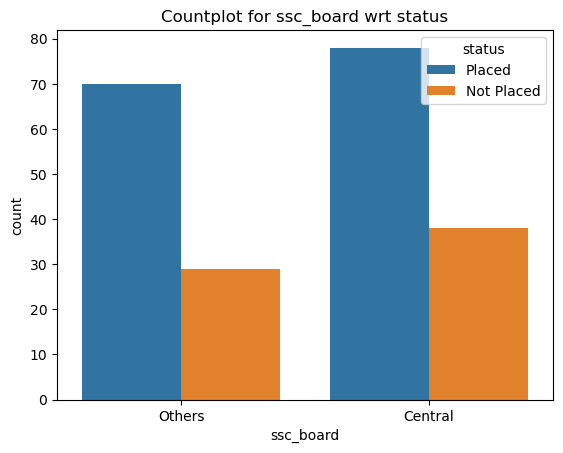

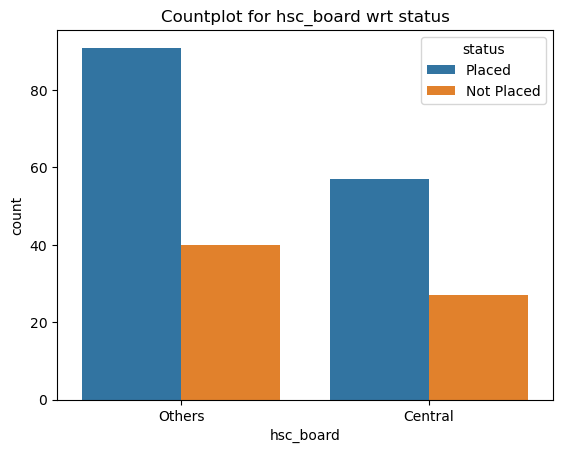

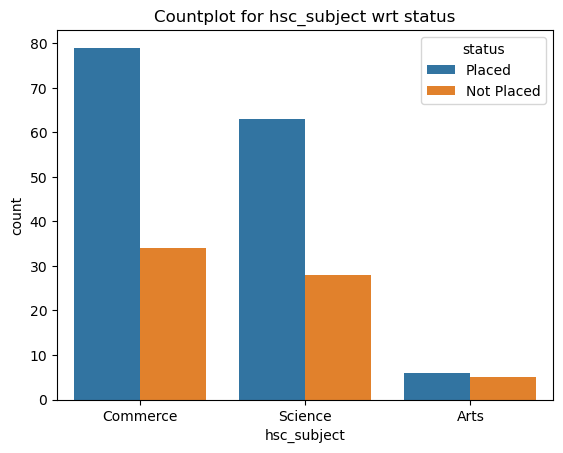

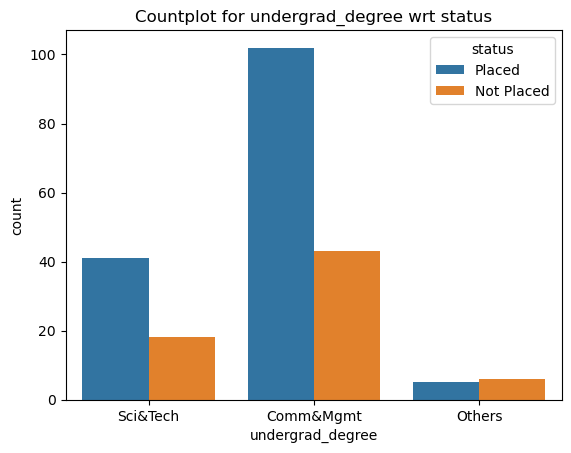

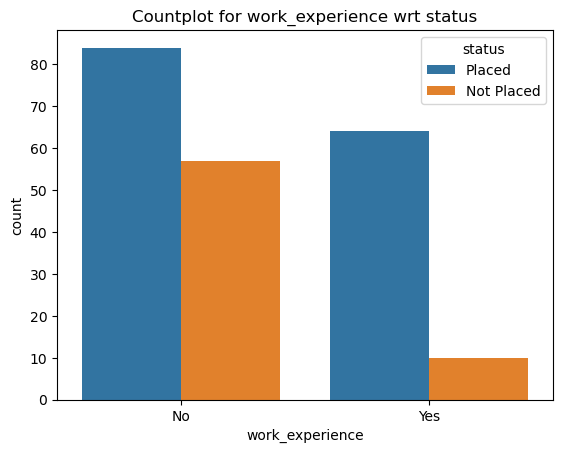

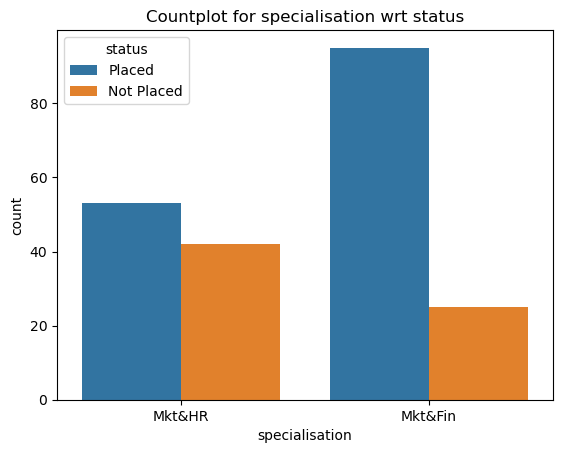

In [10]:
for i in cat_cols[:-1]:
    sns.countplot(x=df[i],hue=df['status'])
    plt.title(f'Countplot for {i} wrt status')
    plt.show()

#### GENERATING BOXPLOT FOR NUMERICAL COLUMNS TO CHECK IF THERE IS ANY OUTLIER PRESENT/NOT 

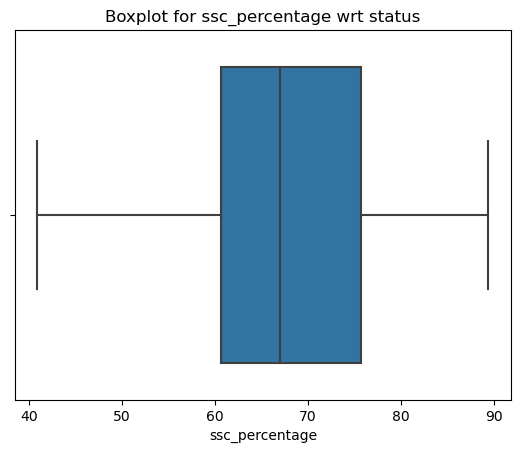

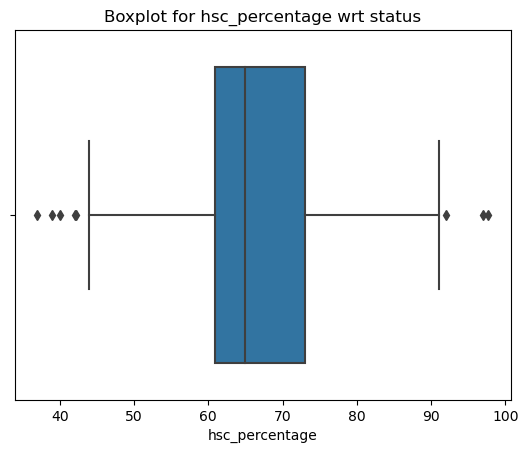

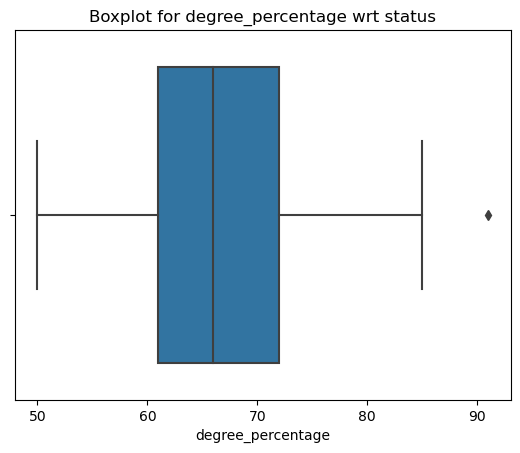

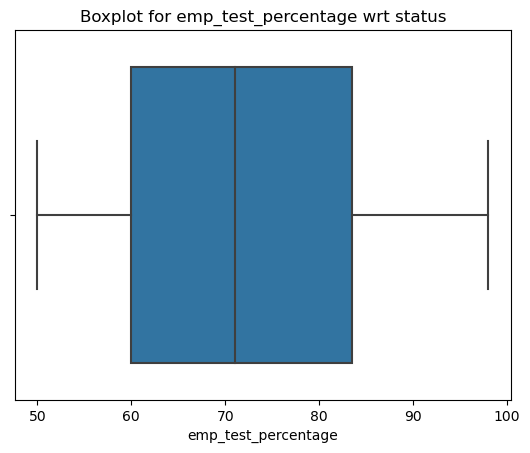

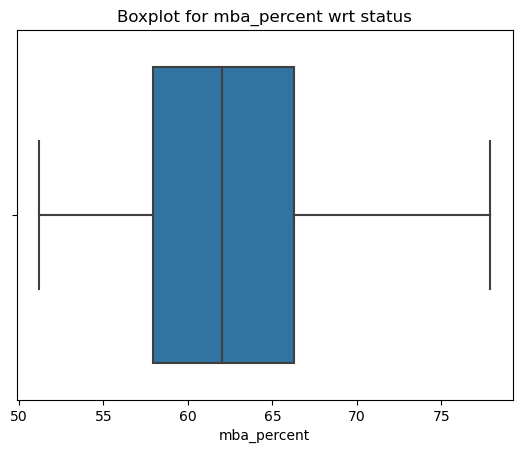

In [11]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i} wrt status')
    plt.show()

#### INFERENCE: 
1) OUTLIERS ARE PRESENT IN TWO COLUMNS 

####  WITH THE USE OF PIPELINE CONCEPT :

In [ ]:
#### Outlier Treatment
#### Encoding Categroical Columns

In [12]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

#### Select independent and dependent features

In [13]:
df.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

In [14]:
x = df.drop('status',axis=1)   # independent feature
y = df['status']               # dependent feature 
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(215, 12)
(215,)


#### Split the data into train and test

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(161, 12)
(54, 12)
(161,)
(54,)


In [17]:
x_train.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent
149,M,44.00,Central,58.0,Central,Arts,55.0,Comm&Mgmt,Yes,64.25,Mkt&HR,58.54
179,F,77.80,Central,64.0,Central,Science,64.2,Sci&Tech,No,75.50,Mkt&HR,72.14
134,F,77.44,Central,92.0,Others,Commerce,72.0,Comm&Mgmt,Yes,94.00,Mkt&Fin,67.13
28,M,76.76,Others,76.5,Others,Commerce,67.5,Comm&Mgmt,Yes,73.35,Mkt&Fin,64.15
208,F,43.00,Central,60.0,Others,Science,65.0,Comm&Mgmt,No,92.66,Mkt&HR,62.92


#### Import ML Models

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

### ML model with Pipeline

In [22]:
print(df.columns)
print(cat_cols)    # [0,2,4,5,7,8,10] - index of columns that needs encoding
# columns that needs Outlier Treatment - [3] - from  num_cols 

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')
Index(['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree',
       'work_experience', 'specialisation', 'status'],
      dtype='object')


#### Log_Reg

In [23]:
step1 = ColumnTransformer(transformers =
                         [('enc_col',OneHotEncoder(drop='first',sparse=False),[0,2,4,5,7,8,10]),
                         ('robust_scale',RobustScaler(),[3])],
                         remainder='passthrough') #remainder means the remaining cols remains the same 
         # here we have used robust scaler to imply both outlier treatment and scaling of data
    
step2 = LogisticRegression(max_iter=1000)

pipe_lr = Pipeline([('step1',step1),('step2',step2)])

pipe_lr.fit(x_train,y_train)

ypred_lr = pipe_lr.predict(x_test)

eval_model(y_test,ypred_lr)

[[13  2]
 [ 5 34]]
              precision    recall  f1-score   support

  Not Placed       0.72      0.87      0.79        15
      Placed       0.94      0.87      0.91        39

    accuracy                           0.87        54
   macro avg       0.83      0.87      0.85        54
weighted avg       0.88      0.87      0.87        54



In [24]:
x_train.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent
149,M,44.00,Central,58.0,Central,Arts,55.0,Comm&Mgmt,Yes,64.25,Mkt&HR,58.54
179,F,77.80,Central,64.0,Central,Science,64.2,Sci&Tech,No,75.50,Mkt&HR,72.14
134,F,77.44,Central,92.0,Others,Commerce,72.0,Comm&Mgmt,Yes,94.00,Mkt&Fin,67.13
28,M,76.76,Others,76.5,Others,Commerce,67.5,Comm&Mgmt,Yes,73.35,Mkt&Fin,64.15
208,F,43.00,Central,60.0,Others,Science,65.0,Comm&Mgmt,No,92.66,Mkt&HR,62.92


#### KNN

In [25]:
step3 = KNeighborsClassifier(n_neighbors=11)

pipe_knn = Pipeline([('step1',step1),('step3',step3)])

pipe_knn.fit(x_train,y_train)

ypred_knn = pipe_knn.predict(x_test)

eval_model(y_test,ypred_knn)

[[11  4]
 [ 4 35]]
              precision    recall  f1-score   support

  Not Placed       0.73      0.73      0.73        15
      Placed       0.90      0.90      0.90        39

    accuracy                           0.85        54
   macro avg       0.82      0.82      0.82        54
weighted avg       0.85      0.85      0.85        54



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### IN THIS DATA WE HAVE USED TWO MODELS: LOGISTIC REGRESSSION AND KNN MODEL 

#### Save the model

In [26]:
import pickle

In [27]:
pickle.dump(pipe_lr, open('lr1.pkl','wb')) # saving the best performing model
pickle.dump(df, open('df1.pkl','wb'))      # saving the dataframe
# wb - write binary

In [28]:
import os

In [29]:
print(os.getcwd())

C:\Users\LENOVO\Downloads\python files\ML


In [30]:
import sklearn

In [31]:
print(sklearn.__version__)

1.0.2
